In [1]:
from fastai.basics import *
from fastai.vision.all import *
from sklearn import metrics

/home/tiago/anaconda3/envs/fastai/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370151529/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from my_utils import dotdict

In [4]:
from wandb_sweep import get_dls, get_learner

In [5]:
from model_eval import get_val_preds, plot_CM, plot_CM_PR, plot_top_losses_glitches

In [6]:
import wandb

api = wandb.Api()

#### baseline

In [7]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
best_run_config = sweep.best_run().config

wandb: Sorting runs by -summary_metrics.combined_f1_time


In [8]:
config = dotdict(best_run_config)
config.correct_labels = True
config.inference = True
config.test_evaluation = True

In [9]:
dls, _, n_channels = get_dls(config)

In [10]:
learner = get_learner(config, dls, n_channels)

In [11]:
learner.load(f"{sweep_id}_run{config.experiment_no}")

In [12]:
preds, targets, soft_preds, y_true, y_pred = get_val_preds(learner)

In [13]:
cm = metrics.confusion_matrix(y_true, y_pred)

In [14]:
acc = metrics.accuracy_score(y_true, y_pred) * 100
f1 = metrics.f1_score(y_true, y_pred, average="macro") * 100
print(f"Overall accuracy: {acc:.2f}%")
print(f"Macro-averaged F1-score: {f1:.2f}%")

Overall accuracy: 98.68%
Macro-averaged F1-score: 97.18%


In [15]:
vocab = list(learner.dls.train_ds.class_dict.keys())

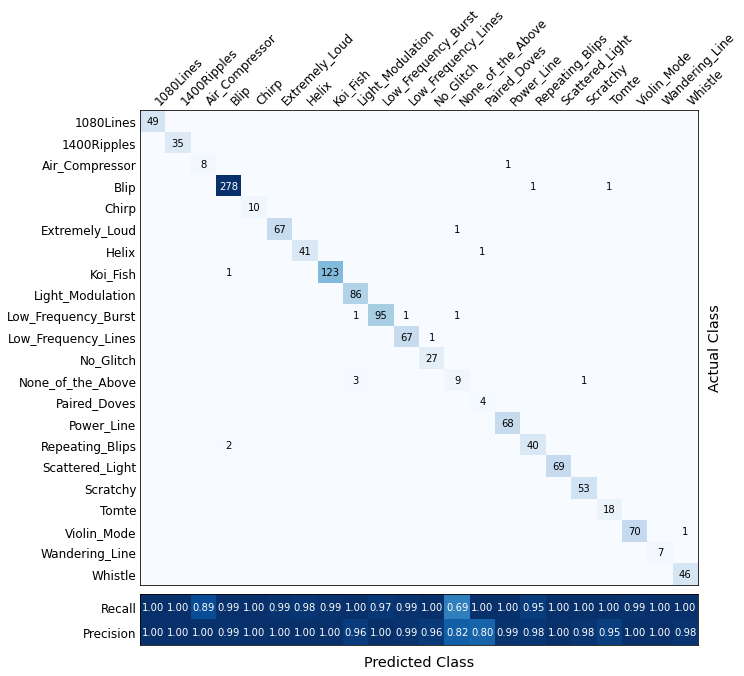

In [16]:
fig, axes = plot_CM_PR(cm, y_true=y_true, y_pred=y_pred, vocab=vocab)
fig.savefig("../figs/glitches/15_baseline_test_cm.pdf", dpi=600, bbox_inches="tight")

In [17]:
interp = Interpretation.from_learner(learner)

In [18]:
channel_list = [2, 0, 2, 0, 
                2, 2, 2, 0, 
                2, 1, 1, 1,
                2, 2, 2, 1,
                1, 2, 2, 2]

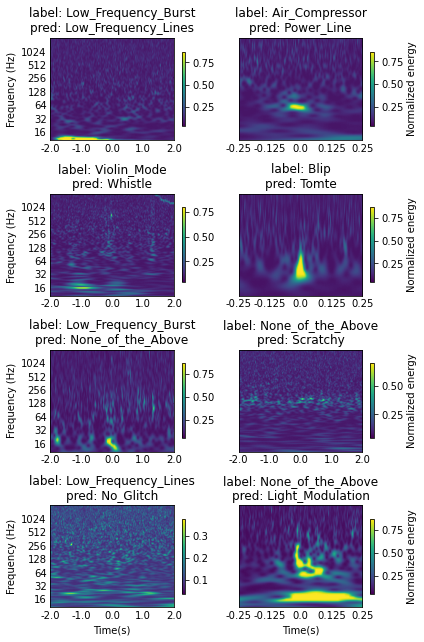

In [19]:
fig, ax = plot_top_losses_glitches(interp, learner, vocab=vocab,
    y_preds=y_pred, channel_list=channel_list,
    largest=True, nrows=4, ncols=2,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(6, 9)
)

# fig.savefig('../figs/glitches/15_baseline_test_mislabeled_samples.png', dpi=300)

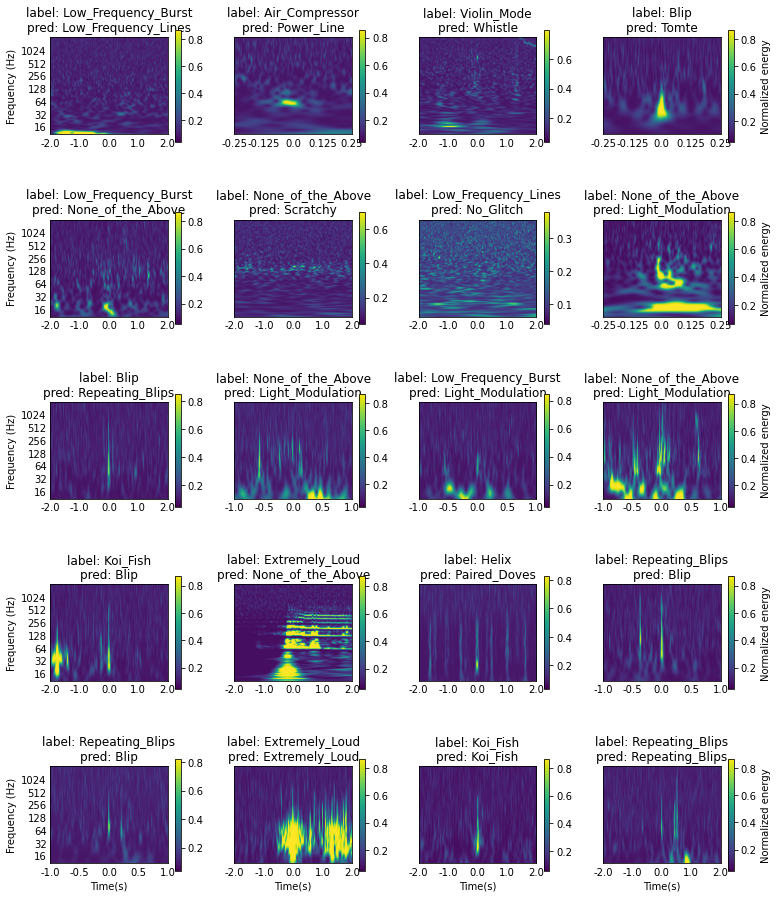

In [20]:
fig, ax = plot_top_losses_glitches(interp, learner, vocab=vocab,
    y_preds=y_pred, channel_list=channel_list,
    largest=True, nrows=5, ncols=4,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(11, 13)
)

#fig.savefig('../figs/glitches/04_baseline_best_mislabeled_samples.png', dpi=300)

In [21]:
top_losses_indices  = interp.top_losses(k=25).indices

In [22]:
torch.topk(soft_preds[top_losses_indices[15]], k=3)

torch.return_types.topk(
values=tensor([0.0782, 0.0639, 0.0429]),
indices=tensor([ 3, 15,  7]))

In [23]:
vocab[3], vocab[15]

('Blip', 'Repeating_Blips')

In [24]:
torch.topk(soft_preds[top_losses_indices[16]], k=3)

torch.return_types.topk(
values=tensor([0.0739, 0.0672, 0.0431]),
indices=tensor([ 3, 15,  7]))

In [25]:
torch.topk(soft_preds[top_losses_indices[7]], k=3)

torch.return_types.topk(
values=tensor([0.1084, 0.0449, 0.0424]),
indices=tensor([ 8, 12,  7]))

In [26]:
vocab[8], vocab[12]

('Light_Modulation', 'None_of_the_Above')

In [27]:
torch.topk(soft_preds[top_losses_indices[9]], k=3)

torch.return_types.topk(
values=tensor([0.1069, 0.0454, 0.0425]),
indices=tensor([ 8, 12,  5]))

In [28]:
torch.topk(soft_preds[top_losses_indices[11]], k=3)

torch.return_types.topk(
values=tensor([0.0989, 0.0497, 0.0426]),
indices=tensor([ 8, 12,  9]))

In [29]:
metrics.top_k_accuracy_score(y_true, soft_preds, k=2)

0.9968919968919969

In [79]:
for index in interp.top_losses(k=20).indices:
    pred = sorted(preds[index], reverse=True)
    soft_pred = sorted(F.softmax(preds[index]), reverse=True)
    print(f'pred0/pred1: {pred[0]/pred[1]:.2f}, prob0/prob1: {soft_pred[0]/soft_pred[1]:.2f}')

pred0/pred1: 10109.84, prob0/prob1: 2.72
pred0/pred1: 333.64, prob0/prob1: 2.69
pred0/pred1: 2.62, prob0/prob1: 1.43
pred0/pred1: 362.57, prob0/prob1: 2.70
pred0/pred1: 43.48, prob0/prob1: 2.56
pred0/pred1: 30.54, prob0/prob1: 2.44
pred0/pred1: 16.99, prob0/prob1: 2.42
pred0/pred1: 15.92, prob0/prob1: 2.41
pred0/pred1: 15.23, prob0/prob1: 2.39
pred0/pred1: 13.57, prob0/prob1: 2.36
pred0/pred1: 5.46, prob0/prob1: 1.93
pred0/pred1: 5.45, prob0/prob1: 1.99
pred0/pred1: 1.74, prob0/prob1: 1.22
pred0/pred1: 3.14, prob0/prob1: 1.64
pred0/pred1: 2.01, prob0/prob1: 1.30
pred0/pred1: 1.51, prob0/prob1: 1.22
pred0/pred1: 1.21, prob0/prob1: 1.10
pred0/pred1: 1.25, prob0/prob1: 1.10
pred0/pred1: 1.14, prob0/prob1: 1.07
pred0/pred1: 1.25, prob0/prob1: 1.11


In [45]:
sorted(preds[10])

[tensor(4.1303e-10),
 tensor(4.8473e-10),
 tensor(5.9533e-10),
 tensor(7.0538e-10),
 tensor(1.0969e-09),
 tensor(1.3995e-09),
 tensor(2.4605e-09),
 tensor(3.0713e-09),
 tensor(3.6788e-09),
 tensor(9.2430e-09),
 tensor(1.0583e-08),
 tensor(1.5556e-08),
 tensor(3.4033e-08),
 tensor(3.6485e-08),
 tensor(5.1451e-08),
 tensor(9.1604e-08),
 tensor(9.9210e-08),
 tensor(1.4703e-07),
 tensor(2.2856e-07),
 tensor(6.1023e-07),
 tensor(6.3715e-06),
 tensor(1.0000)]

In [52]:
sorted(soft_preds[10])

[tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.0422),
 tensor(0.1146)]

In [40]:
F.softmax(preds)

tensor([[0.1146, 0.0422, 0.0422,  ..., 0.0422, 0.0422, 0.0422],
        [0.1146, 0.0422, 0.0422,  ..., 0.0422, 0.0422, 0.0422],
        [0.1146, 0.0422, 0.0422,  ..., 0.0422, 0.0422, 0.0422],
        ...,
        [0.0422, 0.0422, 0.0422,  ..., 0.0422, 0.0422, 0.1146],
        [0.0422, 0.0422, 0.0422,  ..., 0.0422, 0.0422, 0.1145],
        [0.0422, 0.0422, 0.0422,  ..., 0.0422, 0.0422, 0.1145]])

In [41]:
F.softmax(tensor([0.2, 0.1]))

tensor([0.5250, 0.4750])

In [44]:
np.exp(0.1) / (np.exp(0.2) + np.exp(0.1))

4.750208125210601e-01